In [31]:
from qiskit import QuantumProgram

# Создаём объект для квантовой программы.
qp = QuantumProgram()

# Теперь необходимо указать сколько нам понадобится
# квантовых регистров (кубит) и классических регистров.
# В обоих случаях указано 2. Помимо количества им
# присваиваются идентификаторы в рамках программы
# `qp` - "qr" и "cr" соответственно.
qr = qp.create_quantum_register('qr', 2)
cr = qp.create_classical_register('cr', 2)

# Создаём квантовую цепь с квантовыми регистрами `qr`,
# классическими регистрами `cr` и называем её "Bell".
qc = qp.create_circuit('Bell',[qr],[cr])

# Начинаем добавлять различные гейты (операции над
# кубитами). Синтаксис следующий: "<квантовая_цепь>.<гейт>
# (<квантовый/классический регистр, параметры, etc. - в
# зависимости от гейта>)".

# Гейт Адамара на нулевой кубит.
qc.h(qr[0])
# Controlled NOT (CNOT) гейт, который использует `qr[0]`
# кубит как управляющий, а кубит `qr[1]` как таргет.
qc.cx(qr[0], qr[1])
# Измерить нулевой кубит и записать измеренное значение в
# нулевой регистр.
qc.measure(qr[0], cr[0])
# Измерить `qr[1]` и записать в `cr[1]`. 
qc.measure(qr[1], cr[1])

# Запустить выполнение программы "Bell" на бэкэнде
# (дефолтно программы запускаются на симуляторе
# "local_qasm_simulator").
result = qp.execute('Bell')

# Посмотреть на результаты программы в виде "{'00': n1,
# '01': n2, ...}", где n1, n2, ... - число
# соответствующих исходов.
print(result.get_counts('Bell'))

{'00': 538, '11': 486}


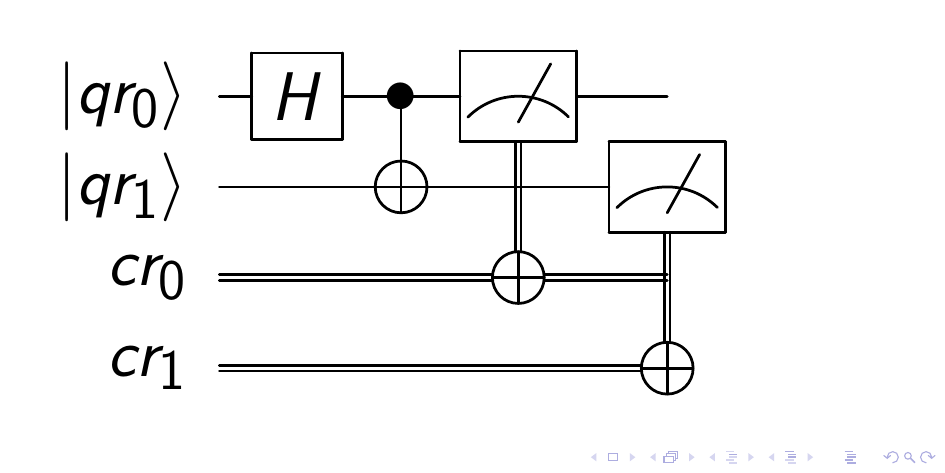

In [32]:
import os
import shutil
from qiskit.tools.visualization import latex_drawer
import pdf2image

def circuitImage(circuit, basis="u1,u2,u3,cx"):
    """Obtain the circuit in image format
    Note: Requires pdflatex installed (to compile Latex)
    Note: Required pdf2image Python package (to display pdf as image)
    """
    filename='circuit'
    tmpdir='tmp/'
    if not os.path.exists(tmpdir):
        os.makedirs(tmpdir)
    latex_drawer(circuit, tmpdir+filename+".tex", basis=basis)
    os.system("pdflatex -output-directory {} {}".format(tmpdir, filename+".tex"))
    images = pdf2image.convert_from_path(tmpdir+filename+".pdf")
    shutil.rmtree(tmpdir)
    return images[0]

basis="u1,u2,u3,cx,x,y,z,h,s,t,rx,ry,rz"
circuitImage(qc, basis)